In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Since the values have no column names, we will assign them will column names.

In [15]:
cols=['ID', 'Topic', 'Sentiment', 'Text']
df = pd.read_csv('twitter_training.csv',names=cols)
df

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Topic      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [21]:
df.describe

<bound method NDFrame.describe of          ID        Topic Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   
74681  9200       Nvidia  Positive   

                                                    Text  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that my Mac wind

Checking for any null values within the dataset and if there are any, we will drop those values within the dataset.

In [23]:
df.isnull().sum()

ID             0
Topic          0
Sentiment      0
Text         686
dtype: int64

In [25]:
df.dropna(inplace = True)

In [27]:
df.isnull().sum()

ID           0
Topic        0
Sentiment    0
Text         0
dtype: int64

Checking for duplicate values:

In [29]:
df.duplicated().sum()

2340

In [37]:
df.drop_duplicates(inplace = True)

In [39]:
df.duplicated().sum()

0

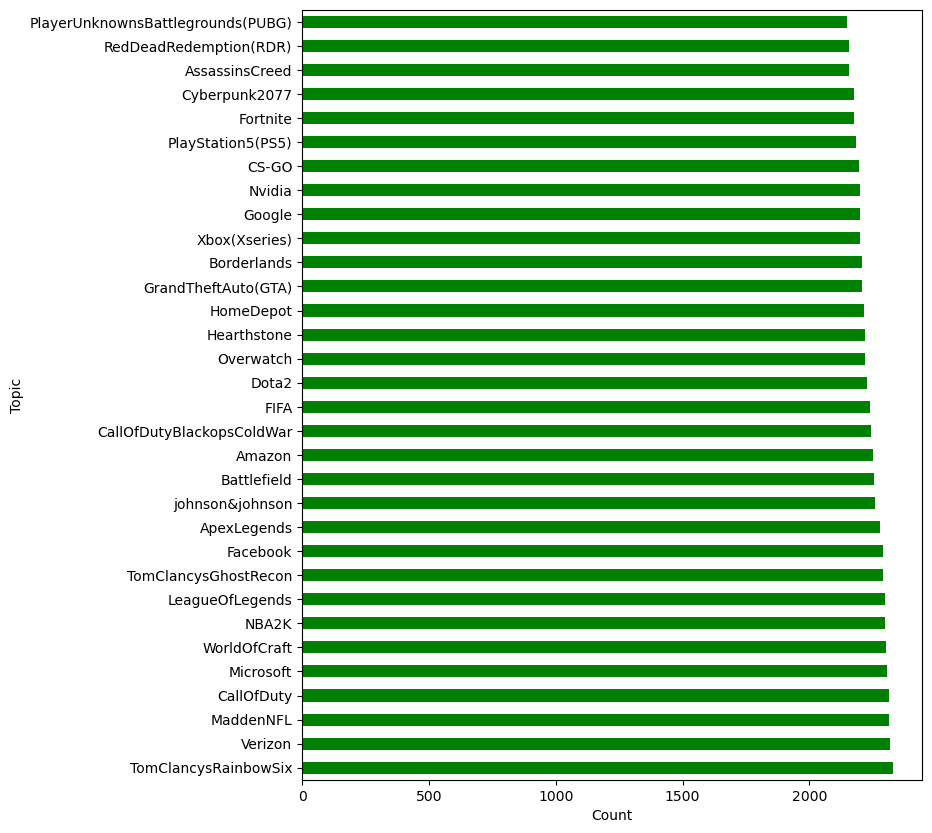

In [41]:
plt.figure(figsize=(8,10))
df['Topic'].value_counts().plot(kind='barh',color='g')
plt.xlabel("Count")
plt.show()

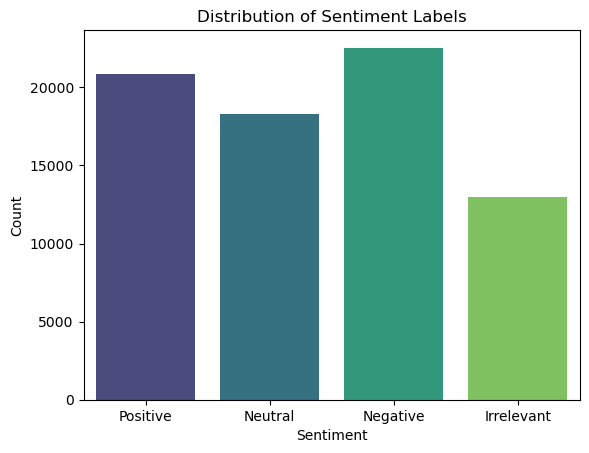

In [51]:
sns.countplot(x='Sentiment',hue='Sentiment', data=train, palette='viridis')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

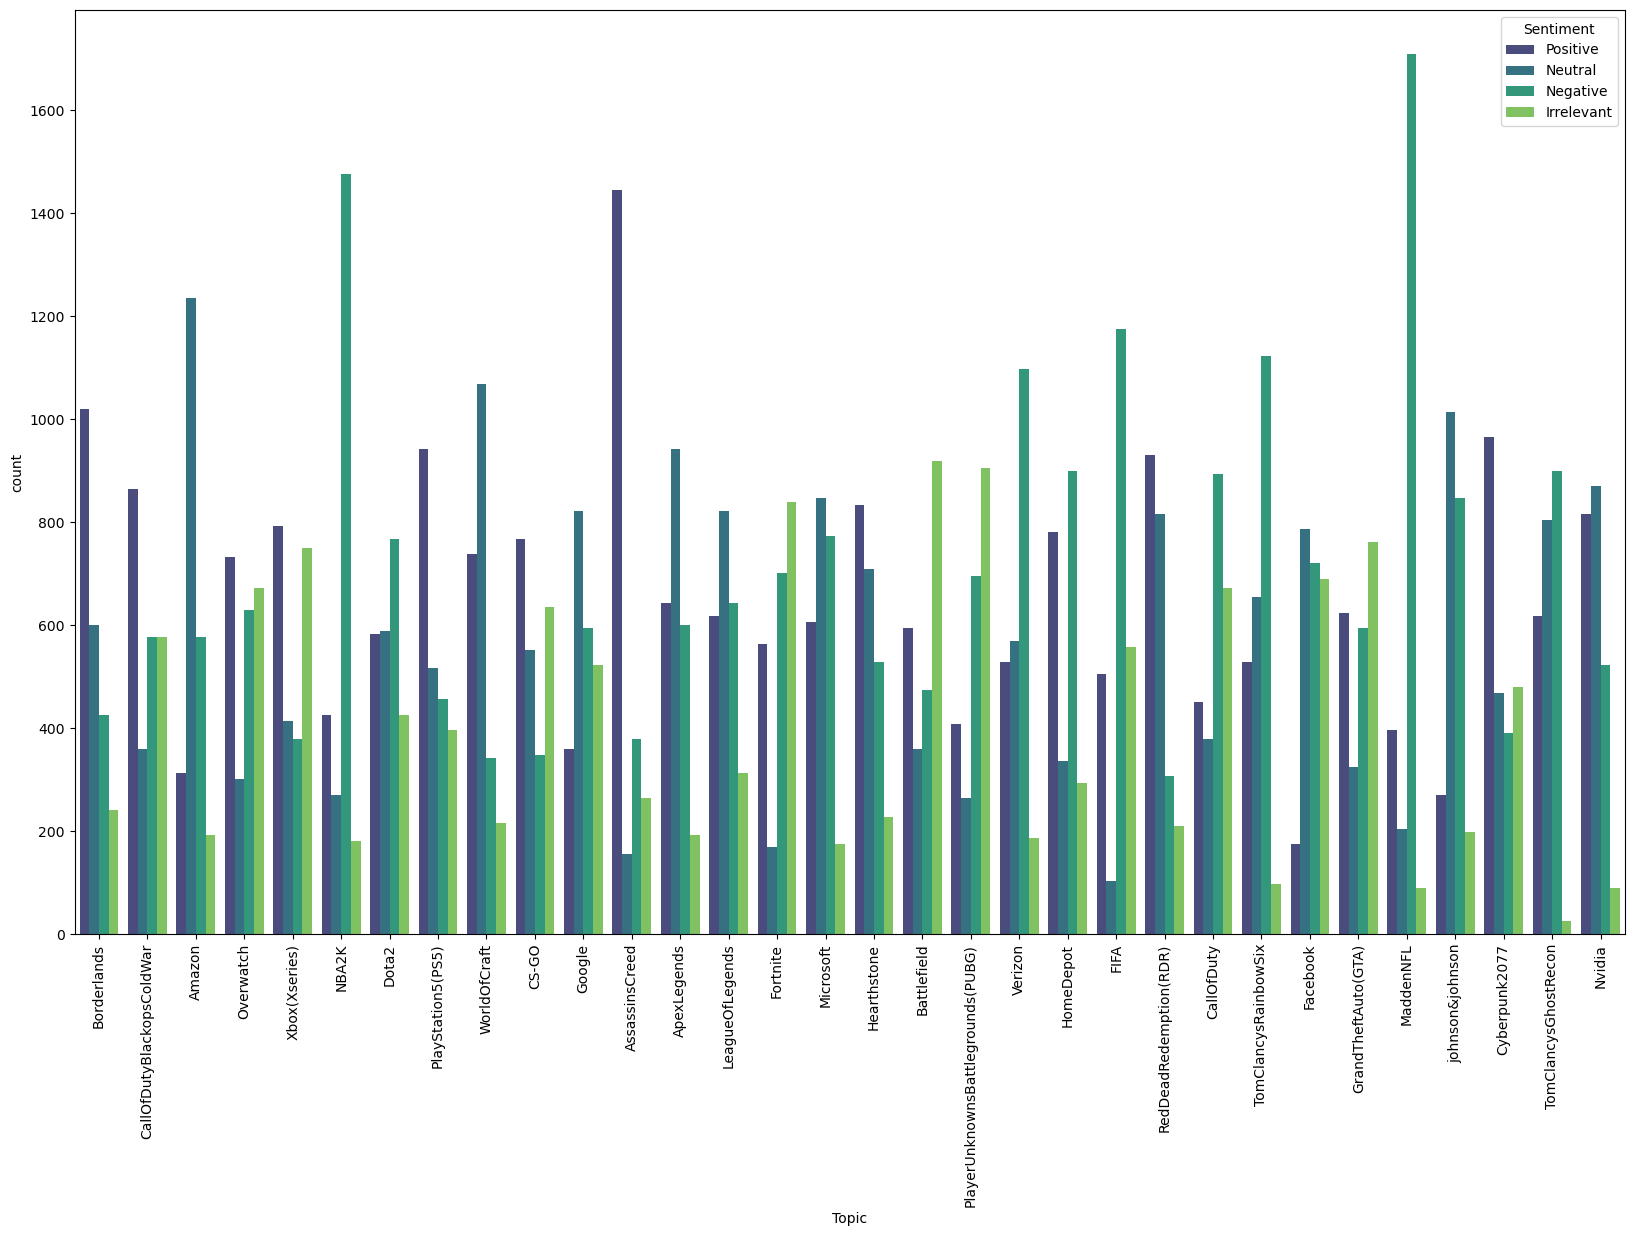

In [53]:
plt.figure(figsize=(20,12))
sns.countplot(x='Topic',data=train,palette='viridis',hue='Sentiment')
plt.xticks(rotation=90)
plt.show()

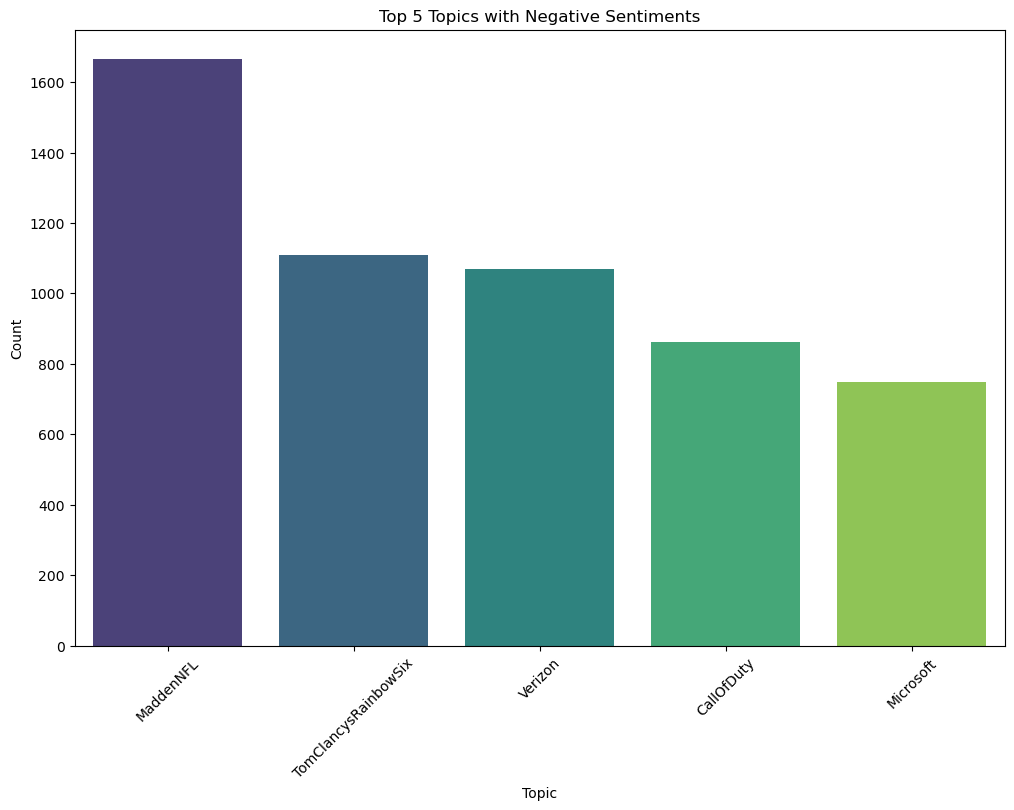

In [63]:
topic_wise_sentiment = df.groupby(["Topic", "Sentiment"]).size().reset_index(name='Count')

top_topics = df['Topic'].value_counts().nlargest(5).index
top_topics_sentiment = topic_wise_sentiment[topic_wise_sentiment['Topic'].isin(top_topics)]


top_5_negative_sentiments = top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Negative'].nlargest(5, 'Count')

plt.figure(figsize=(12, 8))
sns.barplot(data=top_5_negative_sentiments, x='Topic', y='Count', hue='Topic', palette='viridis')
plt.title('Top 5 Topics with Negative Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

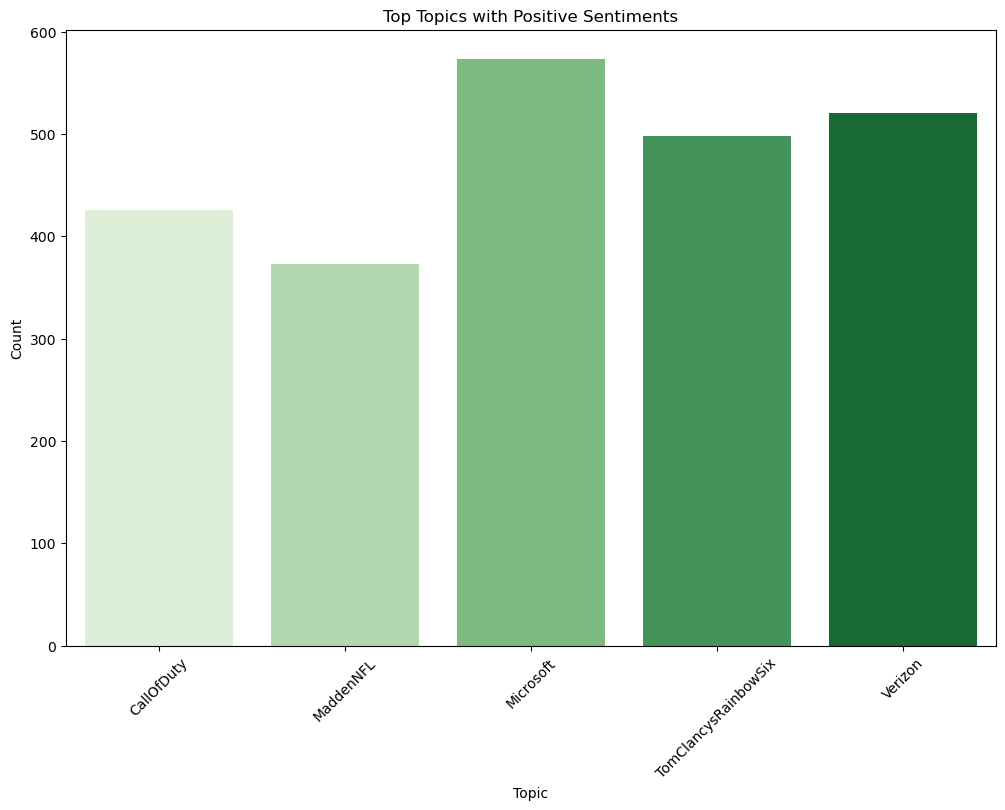

In [65]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Positive'], x='Topic', y='Count', hue='Topic', palette='Greens')
plt.title('Top Topics with Positive Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

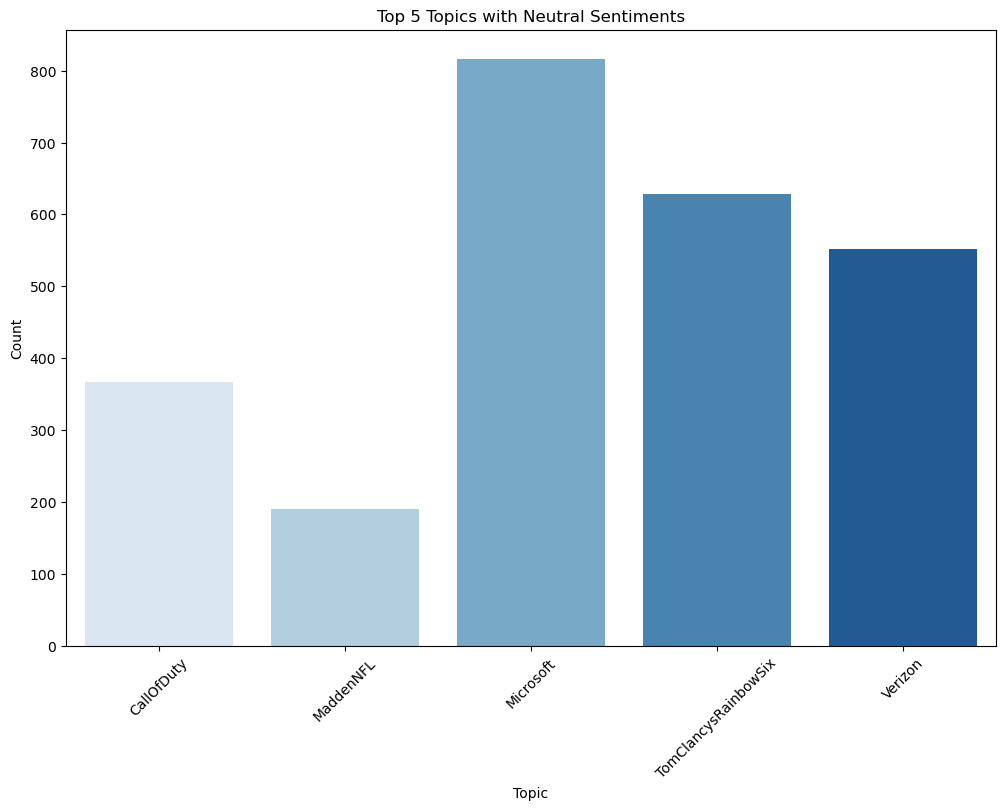

In [67]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Neutral'], x='Topic', y='Count', hue='Topic', palette='Blues')
plt.title('Top 5 Topics with Neutral Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

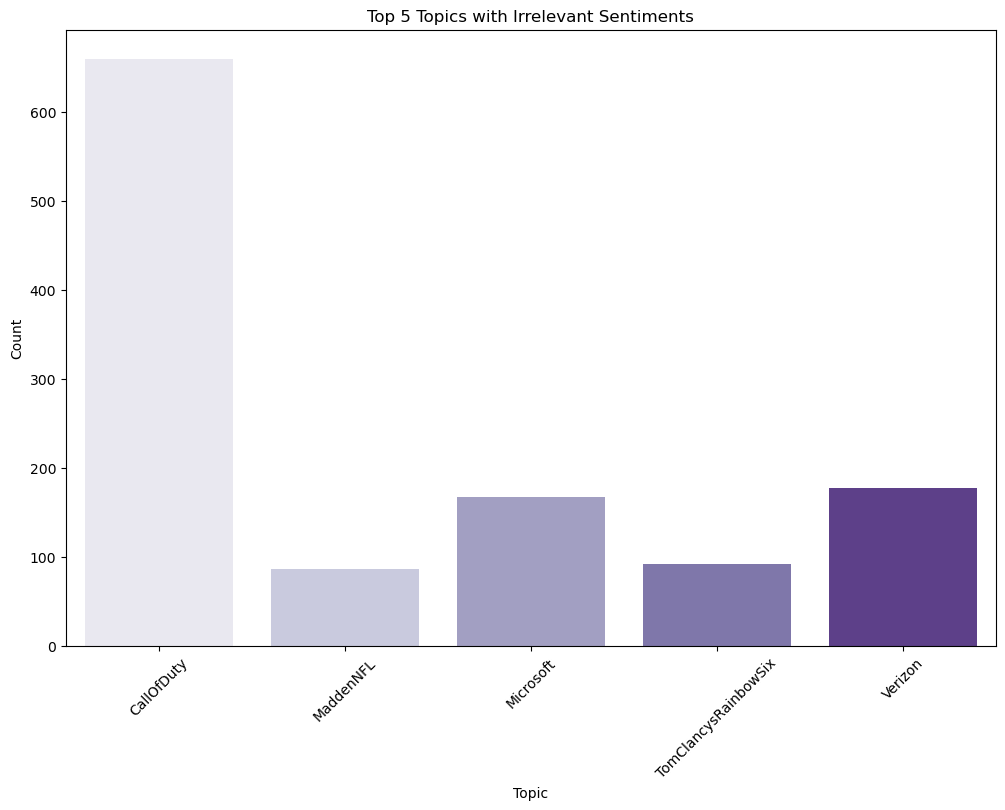

In [69]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Irrelevant'], x='Topic', y='Count', hue='Topic', palette='Purples')
plt.title('Top 5 Topics with Irrelevant Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()